In [20]:
import numpy as np
import scipy.constants as sp
import csv

# emmisivity, refl, trans  csv data transferred into matrix 
e_arr=np.array(list(csv.reader(open("repository/repo/TER_file_cryorun7_emiss.csv","rb"),delimiter=','))).astype('float')
p_arr=np.array(list(csv.reader(open("repository/repo/TER_file_cryorun7_refl.csv","rb"),delimiter=','))).astype('float')
t_arr=np.array(list(csv.reader(open("repository/repo/TER_file_cryorun7_trans.csv","rb"),delimiter=','))).astype('float')
ps=np.array(list(csv.reader(open("repository/repo/spec refl.csv","rb"),delimiter=','))).astype('float')

#np.seterr(over=None)

# constants
b=sp.k # boltzman const(k_b) in SI
sig = sp.sigma # stefan boltzmann constant
c=sp.c # speed of light
h=sp.h # Planck's const
pi=np.pi # pi

T1=300.
Tn=4.200
Q_tot=0.

A=[.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,] #area of the element of our concern
F=[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.] # view factor from the element of our concern to the next one 

row= len(e_arr)      # no of rows
col= len(e_arr[1])   # no of columns
step=1
E_k=[]
Emat=[]

def planck(k, T):
    if (h*c*k/(b*T)) < 10**(-4):
        I = 2.*h*c*(k**3)*(b*T)/(h*c*k)
    elif (h*c*k/(b*T)) > 10**(4):
        I = 0.
    else:
        I = 2.*h*c*(k**3)/(np.exp(h*c*k/(b*T))-1)
    return I

"""for i in range(0,row):
    k=(i+1)*100.
    E_ag= planck(k,T1)"""


"""def E_ag(i,j,Q):
    R1=p_arr[i,j]/((1-p_arr[i,j])*e_arr[i,j]*A[j])
    R2=R1
    R3=(1-t_arr[i,j])/t_arr[i,j]
    QQ=Q*(R1+R2+R3)/R3
    E_ag+=QQ*R1
    Emat.append(E_ag)
    return Emat"""

def E_calc(i,j,Q):
       
        E_ag= planck(k,T1)
        
        for j in range(0,col):
            R1=p_arr[i,j]/((1-p_arr[i,j])*e_arr[i,j]) #*A[j])
            R2=R1
            R3=(1-t_arr[i,j])/(t_arr[i,j]) #*A[j])
            QQ=Q*(R1+R2+R3)/R3
        #if R1==0:
           # EN=QQ
        #else:
            E_ag+=QQ*R1
            
        return E_ag
    

for i in range(0,row):
    R_T=0.
    R_T = p_arr[i,0]/((1-ps[i,0])*e_arr[i,0]) + 1/((1-ps[i,0])*(1-ps[i,1])*F[1]) 

    for j in range(0, col):
        if t_arr[i,j]==0:
            t_arr[i,j]=10**-4
        if j==12:
            ps1=0
        else:
            ps1=ps[i,j+1]
        R_T += (((1-ps[i,j])*e_arr[i,j])/2*p_arr[i,j]) + (1-t_arr[i,j])/t_arr[i,j] + 1/((1-ps[i,j])*(1-ps1)*F[0])
        #print R_T, '*',i,j

    R_T += 1/((1-ps[i,j-2])*(1-ps[i,j-1])*F[0]) + p_arr[i,j-1]/((1-ps[i,j-1])*e_arr[i,j-1])

    k=(i+1)*100.
    Q =(planck(k,T1)-planck(k,Tn))/R_T
    
    Q_tot+=Q*c*pi*100.
    x=E_calc(i,j,Q)
    E_k.append(x)
    #E_ag(i,j,Q)

      
print Q_tot
print R_T
print E_k

0.00412846605946
8.86855034676e+26
[8.2640442212293558e-17, 3.297690959404066e-16, 7.4019980984606081e-16, 1.3127502432324365e-15, 2.0462418659345102e-15, 2.9394999581658283e-15, 3.9913536103211601e-15, 5.2006357227356048e-15, 6.5661830053997789e-15, 8.086835977631133e-15, 9.7614389677016653e-15, 1.158884011242186e-14, 1.3567891356680587e-14, 1.5697448452941485e-14, 1.7976370960695841e-14, 2.0403522245871214e-14, 2.2977769480196734e-14, 2.5697983640524719e-14, 2.8563039508108536e-14, 3.1571815667836888e-14, 3.4723194507424404e-14, 3.8016062216558778e-14, 4.1449308786004289e-14, 4.5021828006661589e-14, 4.8732517468584664e-14, 5.2580278559953295e-14, 5.6564016466002967e-14, 6.0682640167911118e-14, 6.4935062441639604e-14, 6.9320199856734469e-14, 7.3836972775081998e-14, 7.8484305349621523e-14, 8.3261125523015319e-14, 8.8166365026274946e-14, 9.3198959377344496e-14, 9.8357847879641503e-14, 1.0364197362055316e-13, 1.0905028346989111e-13, 1.1458172807830281e-13, 1.2023526187563958e-13, 1.26009

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: overflow encountered in exp


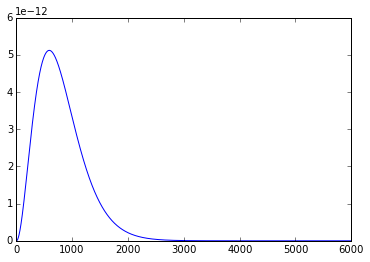

In [21]:
import matplotlib.pyplot as pyt
%matplotlib inline
k = list(xrange(6000))
pyt.plot(k,E_k)
pyt.show()
print Emat